# Python Download, Installation and Execution Instructions

https://www.ics.uci.edu/~pattis/common/handouts/pythoneclipsejava/python.html

https://www.python-course.eu/python3_execute_script.php

# Image Blurring (Image Smoothing)

* Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noises. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation. (Well, there are blurring techniques which doesn't blur the edges too). OpenCV provides mainly four types of blurring techniques.

**1. Averaging**

This is done by convolving image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replace the central element. This is done by the function cv2.blur() or cv2.boxFilter(). We should specify the width and height of kernel. A 3x3 normalized box filter would look like below:

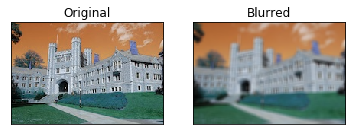

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('princeton.jpg')
blur = cv2.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

**2. Gaussian Blurring**

* In this, instead of box filter, gaussian kernel is used. It is done with the function, cv2.GaussianBlur(). We should specify the width and height of kernel which should be positive and odd. We also should specify the standard deviation in X and Y direction, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as same as sigmaX. If both are given as zeros, they are calculated from kernel size. Gaussian blurring is highly effective in removing gaussian noise from the image.If you want, you can create a Gaussian kernel with the function, cv2.getGaussianKernel().

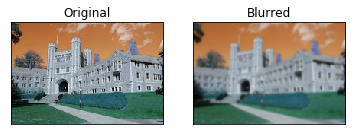

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('princeton.jpg')
blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

**3. Median Blurring**

* Here, the function cv2.medianBlur() takes median of all the pixels under kernel area and central element is replaced with this median value. This is highly effective against salt-and-pepper noise in the images. Interesting thing is that, in the above filters, central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.In this demo, I added a 50% noise to our original image and applied median blur.

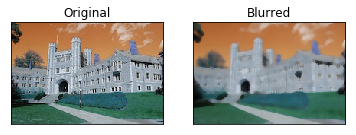

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('princeton.jpg')
median = cv2.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

**4. Bilateral Filtering**

* cv2.bilateralFilter() is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that gaussian filter takes the a neighbourhood around the pixel and find its gaussian weighted average. This gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost same intensity. It doesn't consider whether pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

* Bilateral filter also takes a gaussian filter in space, but one more gaussian filter which is a function of pixel difference. Gaussian function of space make sure only nearby pixels are considered for blurring while gaussian function of intensity difference make sure only those pixels with similar intensity to central pixel is considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

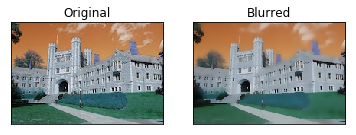

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('princeton.jpg')
blur = cv2.bilateralFilter(img,9,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# Edge Detect

(Text(0.5,1,'Sobel Y'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

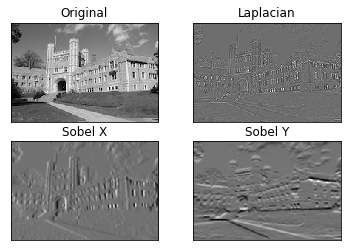

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('princeton.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

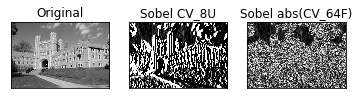

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('princeton.jpg',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

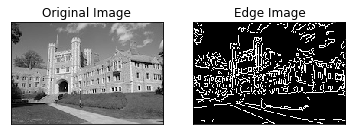

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('princeton.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Image Processing Using Matplotlib

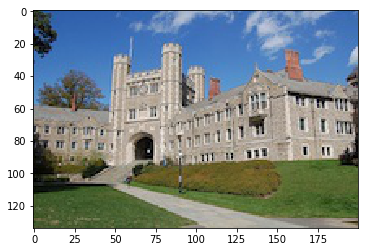

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img=mpimg.imread('princeton.jpg')
imgplot = plt.imshow(img)

**Applying pseudocolor schemes to image plots**

* Pseudocolor can be a useful tool for enhancing contrast and visualizing your data more easily. This is especially useful when making presentations of your data using projectors - their contrast is typically quite poor.

* Pseudocolor is only relevant to single-channel, grayscale, luminosity images. We currently have an RGB image

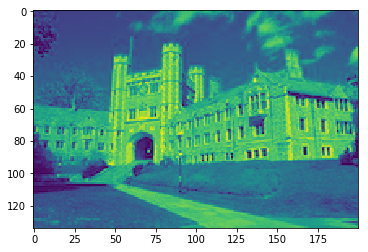

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img = mpimg.imread('princeton.jpg')
lum_img = img[:, :, 0]
plt.imshow(lum_img)

Now, with a luminosity (2D, no color) image, the default colormap (aka lookup table, LUT), is applied. The default is called viridis. There are plenty of others to choose from.

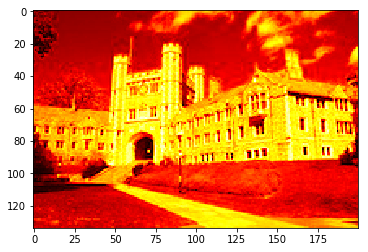

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img = mpimg.imread('princeton.jpg')
lum_img = img[:, :, 0]
plt.imshow(lum_img, cmap="hot")

**Note:** that you can also change colormaps on existing plot objects using the set_cmap()

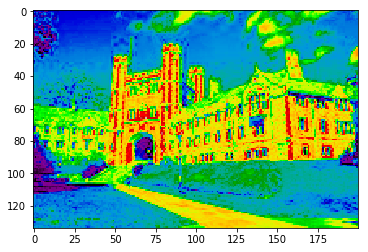

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img = mpimg.imread('princeton.jpg')
lum_img = img[:, :, 0]
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

**Note:**

However, remember that in the IPython notebook with the inline backend, you can’t make changes to plots that have already been rendered. If you create imgplot here in one cell, you cannot call set_cmap() on it in a later cell and expect the earlier plot to change. Make sure that you enter these commands together in one cell. plt commands will not change plots from earlier cells.

# Color scale reference

It’s helpful to have an idea of what value a color represents. We can do that by adding color bars.

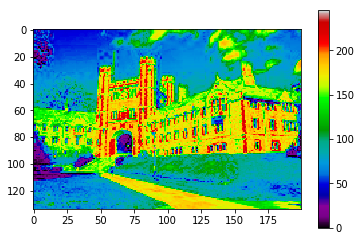

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img = mpimg.imread('princeton.jpg')
lum_img = img[:, :, 0]
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')
plt.colorbar()

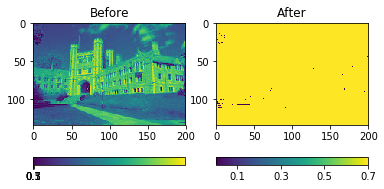

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
fig = plt.figure()
a=fig.add_subplot(1,2,1)
img = mpimg.imread('princeton.jpg')
lum_img = img[:,:,0]
imgplot = plt.imshow(lum_img)
a.set_title('Before')
plt.colorbar(ticks=[0.1,0.3,0.5,0.7], orientation ='horizontal')
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0,0.7)
a.set_title('After')
plt.colorbar(ticks=[0.1,0.3,0.5,0.7], orientation='horizontal')

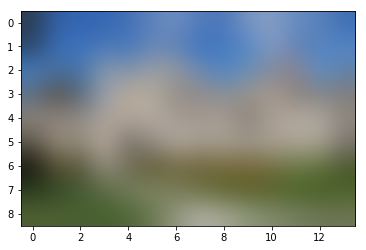

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open('princeton.jpg')  # opens the file using Pillow - it's not an array yet
img.thumbnail((14, 14), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img, interpolation="bicubic")

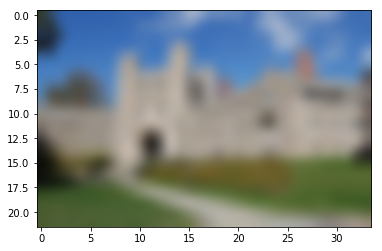

In [17]:
img = Image.open('princeton.jpg')  # opens the file using Pillow - it's not an array yet
img.thumbnail((34, 34), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img, interpolation="bicubic")

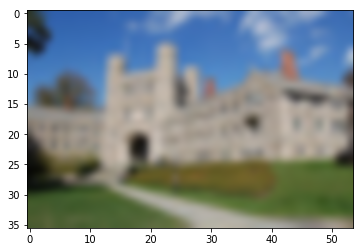

In [18]:
img = Image.open('princeton.jpg')  # opens the file using Pillow - it's not an array yet
img.thumbnail((54, 54), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img, interpolation="bicubic")

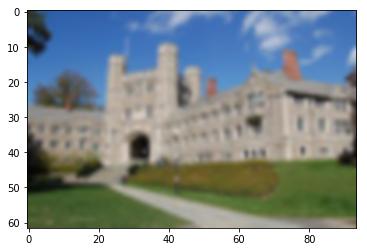

In [23]:
img = Image.open('princeton.jpg')  # opens the file using Pillow - it's not an array yet
img.thumbnail((94, 94), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img, interpolation="bicubic")

# Converting into Grayscale Image

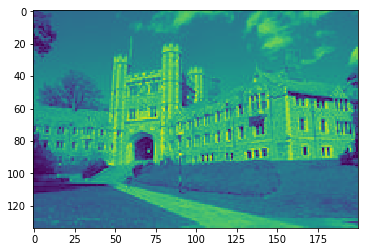

In [58]:
image = Image.open('princeton.jpg')

greyscale_image = image.convert('L')
greyscale_image.save('output/princeton_grey.jpg')

img=mpimg.imread('output/princeton_grey.jpg')
imgplot = plt.imshow(img)

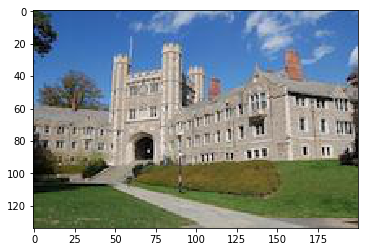

In [59]:
image = Image.open('princeton.jpg')

greyscale_image = image.convert('RGB')
greyscale_image.save('output/princeton_rgb.jpg')

img=mpimg.imread('output/princeton_rgb.jpg')
imgplot = plt.imshow(img)

In [20]:
from PIL import Image
image = Image.open('princeton.jpg')

image_rot_90 = image.rotate(90)
image_rot_90.save('image_rot_90.jpg')
image_rot_90.show()

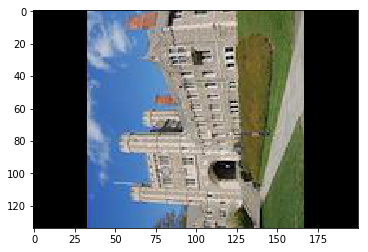

In [22]:
img=mpimg.imread('image_rot_90.jpg')
imgplot = plt.imshow(img)

# Image processing using Pillow

In [26]:
from PIL import Image, ImageFilter

im = Image.open("princeton.jpg")
im = im.filter(ImageFilter.SHARPEN)

im.save("prince.jpg")
im.show()

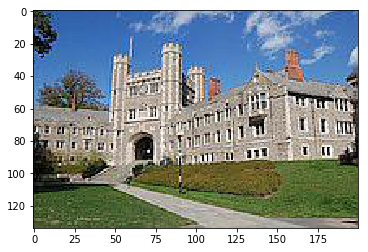

In [27]:
img=mpimg.imread('prince.jpg')
imgplot = plt.imshow(img)

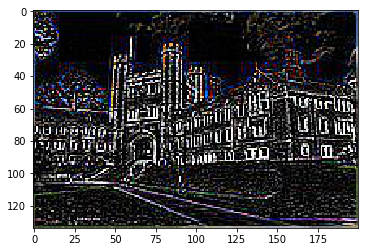

In [29]:
from PIL import Image, ImageFilter

im = Image.open("princeton.jpg")
im = im.filter(ImageFilter.FIND_EDGES)

im.save("prince_edge_.jpg")
im.show()
img=mpimg.imread('prince_edge_.jpg')
imgplot = plt.imshow(img)

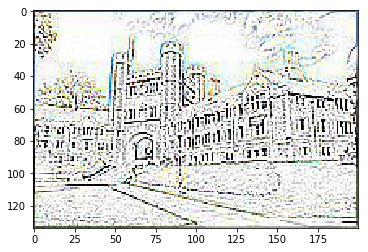

In [31]:
from PIL import Image, ImageFilter

im = Image.open("princeton.jpg")
im = im.filter(ImageFilter.CONTOUR)

im.save("prince_CONTOUR_.jpg")
im.show()
img=mpimg.imread('prince_CONTOUR_.jpg')
imgplot = plt.imshow(img)

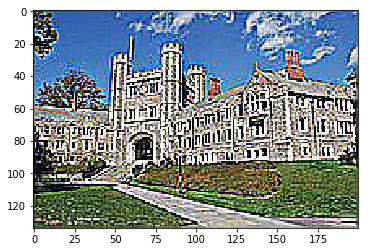

In [32]:
from PIL import Image, ImageFilter

im = Image.open("princeton.jpg")
im = im.filter(ImageFilter.EDGE_ENHANCE_MORE)

im.save("prince_EDGE_ENHANCE_MORE_.jpg")
im.show()
img=mpimg.imread('prince_EDGE_ENHANCE_MORE_.jpg')
imgplot = plt.imshow(img)

# Enhancing Images with Python

The first thing you will need is the Pillow package which you can install using pip:

**pip install Pillow**

Now that we have Pillow installed, we can get started!

**Changing the Brightness**

Let’s try brightening up this photo anyway. The key to enhancing photos is using Pillow’s ImageEnhance module. Let’s take a look

In [38]:
from PIL import Image
from PIL import ImageEnhance
 
 
def adjust_brightness(input_image, output_image, factor):
    image = Image.open(input_image)
    enhancer_object = ImageEnhance.Brightness(image)
    out = enhancer_object.enhance(factor)
    out.save(output_image)
 
if __name__ == '__main__':
    adjust_brightness('princeton.jpg',
                      'output/princeton.jpg',
                      1.7)

Here we import the pieces we need from Pillow and then we open the input image in our function. Next we need to create an “enhancer” object. In this case we use the ImageEnhance’s Brightness class and pass it our image object. Next we call the enhance() method and give it the enhancement factor. According to the Pillow documentation, you need to have a factor greater than 1.0 to add brightness to your photo. If you just give it a factor of 1.0, then it will return the original image unchanged.

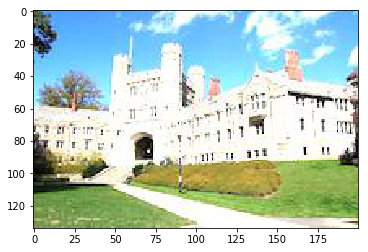

In [39]:
#If you run this code, you will get something like Below Image

img=mpimg.imread('output/princeton.jpg')
imgplot = plt.imshow(img)

In [40]:
from PIL import Image
from PIL import ImageEnhance
 
 
def adjust_brightness(input_image, output_image, factor):
    image = Image.open(input_image)
    enhancer_object = ImageEnhance.Brightness(image)
    out = enhancer_object.enhance(factor)
    out.save(output_image)
 
if __name__ == '__main__':
    adjust_brightness('princeton.jpg',
                      'output/princeton1.jpg',
                      0.7)

You can also pass an enhancement factor below 1.0 down to 0.0. If you go all the way down to 0.0, you will receive a completely black image according to the documentation. Just for fun, try changing the enhancement factor in the code above to 0.7. If you do, then you will get the following result:

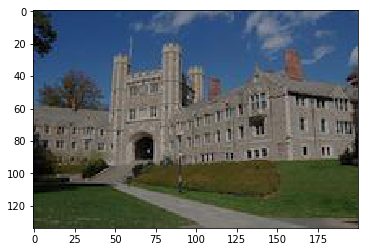

In [41]:
img=mpimg.imread('output/princeton1.jpg')
imgplot = plt.imshow(img)

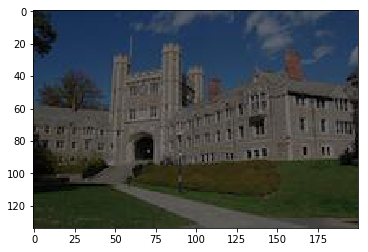

In [42]:
from PIL import Image
from PIL import ImageEnhance
 
 
def adjust_brightness(input_image, output_image, factor):
    image = Image.open(input_image)
    enhancer_object = ImageEnhance.Brightness(image)
    out = enhancer_object.enhance(factor)
    out.save(output_image)
 
if __name__ == '__main__':
    adjust_brightness('princeton.jpg',
                      'output/princeton2.jpg',
                      0.5)
 #taken the brightness value  = 0.5   
img=mpimg.imread('output/princeton2.jpg')
imgplot = plt.imshow(img)

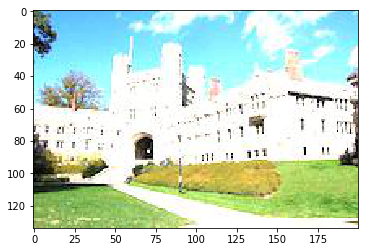

In [43]:
from PIL import Image
from PIL import ImageEnhance
 
 
def adjust_brightness(input_image, output_image, factor):
    image = Image.open(input_image)
    enhancer_object = ImageEnhance.Brightness(image)
    out = enhancer_object.enhance(factor)
    out.save(output_image)
 
if __name__ == '__main__':
    adjust_brightness('princeton.jpg',
                      'output/princeton3.jpg',
                      2.0)
 #taken the brightness value  = 2.0   
img=mpimg.imread('output/princeton3.jpg')
imgplot = plt.imshow(img)

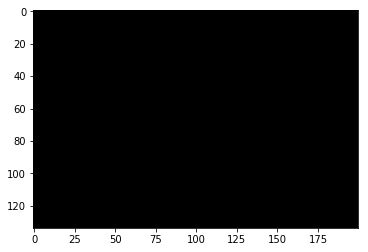

In [53]:
from PIL import Image
from PIL import ImageEnhance
 
 
def adjust_brightness(input_image, output_image, factor):
    image = Image.open(input_image)
    enhancer_object = ImageEnhance.Brightness(image)
    out = enhancer_object.enhance(factor)
    out.save(output_image)
 
if __name__ == '__main__':
    adjust_brightness('princeton.jpg',
                      'output/princeton4.jpg',
                      0.0)
 #taken the brightness value  = 0.0 
img=mpimg.imread('output/princeton4.jpg')
imgplot = plt.imshow(img)

**Adjusting the Contrast of Your Image**

In this example, we will add contrast to the input photo. However you could easily add brightness too by combining the following code with the previous example:

In [48]:
from PIL import Image
from PIL import ImageEnhance
 
def adjust_contrast(input_image, output_image, factor):
    image = Image.open(input_image)
    enhancer_object = ImageEnhance.Contrast(image)
    out = enhancer_object.enhance(factor)
    out.save(output_image)
 
if __name__ == '__main__':
    adjust_contrast('c.jpg',
                    'output/c1.jpg',
                    0.5)

This code is very similar to the brightening function. The only difference is that here we are using the Contrast class from the ImageEnhance module instead of the Brightness class. When I ran this code, I got the following enhancement:

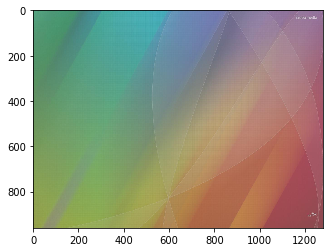

In [49]:
#taken the Contrast value  = 0.5   
img=mpimg.imread('output/c1.jpg')
imgplot = plt.imshow(img)

All the classes in the ImageEnhance module behave in the same way. If you happen to try passing it an enhancement value of 1.0, you just get the original image back with no adjustments added. But if you go to a value from 0.0 – 1.0, you will reduce contrast. You can play around with the enhancement factor yourself to see what kinds of changes you can make to your own images. I tried changing it to -0.5 and ended up with this:

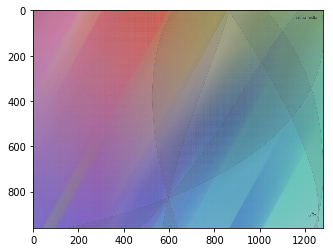

In [50]:
from PIL import Image
from PIL import ImageEnhance
 
def adjust_contrast(input_image, output_image, factor):
    image = Image.open(input_image)
    enhancer_object = ImageEnhance.Contrast(image)
    out = enhancer_object.enhance(factor)
    out.save(output_image)
 
if __name__ == '__main__':
    adjust_contrast('c.jpg',
                    'output/c2.jpg',
                    -0.5)
#taken the Contrast value  = -0.5  
img=mpimg.imread('output/c2.jpg')
imgplot = plt.imshow(img)

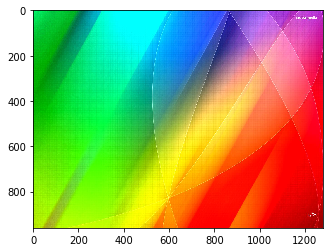

In [51]:
from PIL import Image
from PIL import ImageEnhance
 
def adjust_contrast(input_image, output_image, factor):
    image = Image.open(input_image)
    enhancer_object = ImageEnhance.Contrast(image)
    out = enhancer_object.enhance(factor)
    out.save(output_image)
 
if __name__ == '__main__':
    adjust_contrast('c.jpg',
                    'output/c3.jpg',
                    2.0)
#taken the Contrast value  = 2.0  
img=mpimg.imread('output/c3.jpg')
imgplot = plt.imshow(img)

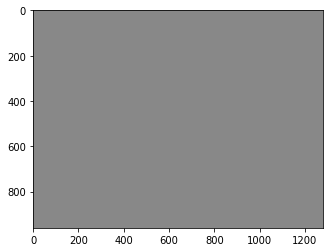

In [52]:
from PIL import Image
from PIL import ImageEnhance
 
def adjust_contrast(input_image, output_image, factor):
    image = Image.open(input_image)
    enhancer_object = ImageEnhance.Contrast(image)
    out = enhancer_object.enhance(factor)
    out.save(output_image)
 
if __name__ == '__main__':
    adjust_contrast('c.jpg',
                    'output/c4.jpg',
                    0.0)
#taken the Contrast value  = 0.0  
img=mpimg.imread('output/c4.jpg')
imgplot = plt.imshow(img)

# Resize a Photo with Python

Sometimes you will find yourself wanting to resize a photo. I usually want to do this for photos that I want to email or post on a website since some of my images can be quite large. Normal people use an image editor. I usually do as well, but for fun I thought I would look into how to do it with the Python programming language.

The quickest way to do this is to use the Pillow package which you can install with pip. Once you have it, open up your favorite code editor and try the following code:

The original image size is 1280 wide x 960 high
The resized image size is 800 wide x 400 high


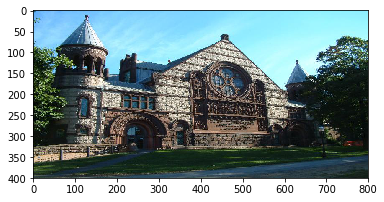

In [56]:
from PIL import Image
 
def resize_image(input_image_path,
                 output_image_path,
                 size):
    original_image = Image.open(input_image_path)
    width, height = original_image.size
    print('The original image size is {wide} wide x {height} '
          'high'.format(wide=width, height=height))
 
    resized_image = original_image.resize(size)
    width, height = resized_image.size
    print('The resized image size is {wide} wide x {height} '
          'high'.format(wide=width, height=height))
    resized_image.show()
    resized_image.save(output_image_path)
 
if __name__ == '__main__':
    resize_image(input_image_path='scaleinput.jpg',
                 output_image_path='output/scaleinput.jpg',
                 size=(800, 400))
    

img=mpimg.imread('output/scaleinput.jpg')
imgplot = plt.imshow(img)

**Scaling an Image**

Most of the time, you won’t want to resize your image like we did in the previous example unless you want to write a scaling method. The problem with the previous method is that it does not maintain the photo’s aspect ratio when resizing. So instead of resizing, you can just use the thumbnail() method. Let’s take a look:

The original image size is 1280 wide x 960 high
The scaled image size is 800 wide x 600 high


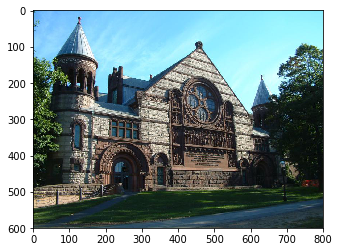

In [57]:
from PIL import Image
 
def scale_image(input_image_path,
                output_image_path,
                width=None,
                height=None
                ):
    original_image = Image.open(input_image_path)
    w, h = original_image.size
    print('The original image size is {wide} wide x {height} '
          'high'.format(wide=w, height=h))
 
    if width and height:
        max_size = (width, height)
    elif width:
        max_size = (width, h)
    elif height:
        max_size = (w, height)
    else:
        # No width or height specified
        raise RuntimeError('Width or height required!')
 
    original_image.thumbnail(max_size, Image.ANTIALIAS)
    original_image.save(output_image_path)
 
    scaled_image = Image.open(output_image_path)
    width, height = scaled_image.size
    print('The scaled image size is {wide} wide x {height} '
          'high'.format(wide=width, height=height))
 
 
if __name__ == '__main__':
    scale_image(input_image_path='scaleinput.jpg',
                output_image_path='output/scaleinput_scaled.jpg',
                width=800)

img=mpimg.imread('output/scaleinput_scaled.jpg')
imgplot = plt.imshow(img)

Here we allow the programmer to pass in the input and output paths as well as our max width and height. We then use a conditional to determine what our max size should be and then we call the thumbnail() method on our open image object. We also pass in the Image.ANTIALIAS flag which will apply a high quality down sampling filter which results in a better image. Finally we open the newly saved scaled image and print out its size to compare with the original size. If you open up the scaled image, you will see that the aspect ratio of the photo was maintained.